### Question 1)
A random classifier would get an approximate accuracy of ~20%, since it has a 1/5 chance of getting a given example correct (since the probability of getting a given class is 1/5).

A majority vote classifier would also get an approximate accuracy of ~20%, since each class occurs with the same probability 1/5. Thus the majority vote classifier will choose one of these classes randomly to always predict, meaning that it will get roughly 1/5 of the examples correct. 

In [252]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import autograd
import torch.nn.functional as F
import random

In [253]:
images1 = np.load("cs475_project_data/images.npy")
num_images, height, width = images1.shape
images1 = images1.reshape(num_images, height*width) #reshape
labels1 = np.load("cs475_project_data/labels.npy")

images = torch.from_numpy(images1)
labels = torch.from_numpy(labels1).type(torch.IntTensor) # make sure int values

images = images.type(torch.DoubleTensor)
images = (images - torch.mean(images))/torch.std(images)
# the above normalizes the data based on z score

In [254]:
# split data
train_data = images[:40000]
dev_data = images[40000:45000]
test_data = images[45000:]

train_labels = labels[:40000]
dev_labels = labels[40000:45000]
test_labels = labels[45000:]

HEIGHT = 26
WIDTH = 26
NUM_CLASSES = 5
NUM_OPT_STEPS = 5000

#i = np.random.choice(train_data.shape[0], size=10, replace=False)
#temp = train_data.numpy()
#temp1 = train_labels.numpy()
#x = autograd.Variable(torch.from_numpy(temp[i].astype(np.float32)))
#y = autograd.Variable(torch.from_numpy(temp1[i].astype(np.int)))
#optimizer.zero_grad()
#y_hat_ = model(x)

In [255]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(HEIGHT * WIDTH, NUM_CLASSES)
    def forward(self, x):
        x = self.linear(x)
        return x
    def accuracy(self, y, y_hat):
        return (y == y_hat).astype(np.float).mean()

### Question 6 
There are (out_features)(in_features) weights, so for our problem, there are (26^2) * (5) = 3380 weights. There are out_features biases, so there are 5 biases. 

In [256]:
model = LinearModel()

### Question 8
Two optimizers present in torch.optim that we have implemented in previous homeworks include stochastic gradient descent (SGD) as well as Adam. The two most important arguments that these optimizing algorithms requires us to provide include: 1) the model parameters to optimize, and 2) the learning rate.

In [257]:
optimizer = torch.optim.Adagrad(model.parameters(), lr=.01)

In [258]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_data.shape[0], size=batch_size, replace=False)
    temp = train_data.numpy()
    temp1 = train_labels.numpy()
    x = autograd.Variable(torch.from_numpy(temp[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(temp1[i].astype(np.int)))
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    optimizer.step()
    return loss.data[0]

In [259]:
def approx_train_accuracy():
    i = np.random.choice(train_data.shape[0], size=1000, replace=False)
    tempy = train_data.numpy()
    tempy1 = train_labels.numpy()
    x = autograd.Variable(torch.from_numpy(tempy[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(tempy1[i].astype(np.int)))
    y_hat_ = model(x)
    #print(y)
    y = y.data.numpy()
    y_hat_ = y_hat_.data.numpy()
    y_hat_ = np.argmax(y_hat_, axis=1)
    #print(y_hat_)
    return (y == y_hat_).astype(np.float).mean()

def val_accuracy():
    i = np.random.choice(dev_data.shape[0], size=5000, replace=False)
    tempy2 = dev_data.numpy()
    tempy3 = dev_labels.numpy()
    x = autograd.Variable(torch.from_numpy(tempy2[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(tempy3[i].astype(np.int)))
    y_hat_ = model(x)
    #print(y)
    y = y.data.numpy()
    y_hat_ = y_hat_.data.numpy()
    y_hat_ = np.argmax(y_hat_, axis=1)
    #print(y_hat_)
    return (y == y_hat_).astype(np.float).mean()

In [263]:
train_accs, val_accs = [], []
iterations = []
print("Using model with initial, unadjusted optimizer and learning rate")
for i in range(NUM_OPT_STEPS):
    train(1)
    if i % 100 == 0:
        iterations.append(i)
        train_accs.append(approx_train_accuracy())
        val_accs.append(val_accuracy())
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))

Using model with initial, unadjusted optimizer and learning rate
     0  0.23  0.24
   100  0.23  0.24
   200  0.23  0.24
   300  0.23  0.24
   400  0.24  0.24
   500  0.23  0.24
   600  0.24  0.24
   700  0.25  0.24
   800  0.24  0.24
   900  0.26  0.25
  1000  0.26  0.25
  1100  0.25  0.25
  1200  0.27  0.25
  1300  0.22  0.25
  1400  0.25  0.25
  1500  0.28  0.25
  1600  0.25  0.25
  1700  0.27  0.25
  1800  0.28  0.25
  1900  0.24  0.25
  2000  0.26  0.25
  2100  0.24  0.25
  2200  0.26  0.25
  2300  0.29  0.25
  2400  0.24  0.25
  2500  0.26  0.26
  2600  0.27  0.26
  2700  0.26  0.26
  2800  0.29  0.26
  2900  0.27  0.26
  3000  0.27  0.26
  3100  0.27  0.26
  3200  0.25  0.26
  3300  0.23  0.26
  3400  0.28  0.26
  3500  0.30  0.26
  3600  0.24  0.26
  3700  0.28  0.26
  3800  0.25  0.26
  3900  0.27  0.26
  4000  0.29  0.26
  4100  0.28  0.26
  4200  0.28  0.27
  4300  0.29  0.27
  4400  0.28  0.27
  4500  0.28  0.27
  4600  0.30  0.27
  4700  0.27  0.27
  4800  0.31  0.27
  49

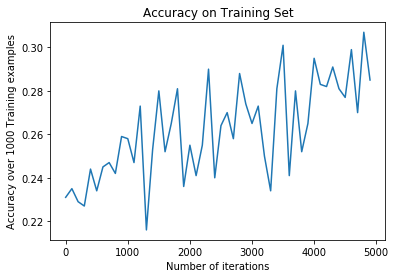

In [264]:
plt.plot(iterations, train_accs)
plt.title("Accuracy on Training Set")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy over 1000 Training examples")
plt.show()

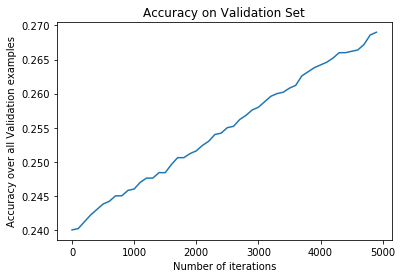

In [265]:
plt.plot(iterations, val_accs)
plt.title("Accuracy on Validation Set")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy over all Validation examples")
plt.show()

### Question 17
It appears as though the top train accuracy achieved was ~30% and the top validation accuracy was ~27%, and neither of these numbers are optimal. Since it appears as though the models are learning (the accuracies increase with increased iteration), it appears that they are not learning quick enough. So, we can probably adjust certain qualities of the model, such as the learning rate, to achieve a better accuracy. 

In [260]:
train_accs, val_accs = [], []
iterations = []
print("Using model with initial, unadjusted optimizer and learning rate")
for i in range(NUM_OPT_STEPS):
    train(1)
    if i % 100 == 0:
        iterations.append(i)
        train_accs.append(approx_train_accuracy())
        val_accs.append(val_accuracy())
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))

Using model with initial, unadjusted optimizer and learning rate
     0  0.25  0.26
   100  0.63  0.63
   200  0.66  0.68
   300  0.69  0.67
   400  0.68  0.70
   500  0.70  0.70
   600  0.70  0.71
   700  0.72  0.72
   800  0.74  0.73
   900  0.74  0.72
  1000  0.74  0.73
  1100  0.72  0.72
  1200  0.73  0.73
  1300  0.74  0.73
  1400  0.73  0.73
  1500  0.73  0.73
  1600  0.77  0.73
  1700  0.73  0.73
  1800  0.74  0.73
  1900  0.72  0.73
  2000  0.74  0.74
  2100  0.71  0.73
  2200  0.75  0.74
  2300  0.73  0.73
  2400  0.73  0.73
  2500  0.75  0.75
  2600  0.77  0.74
  2700  0.73  0.74
  2800  0.76  0.74
  2900  0.76  0.75
  3000  0.77  0.75
  3100  0.74  0.75
  3200  0.76  0.75
  3300  0.77  0.75
  3400  0.72  0.74
  3500  0.74  0.75
  3600  0.77  0.75
  3700  0.77  0.75
  3800  0.74  0.75
  3900  0.76  0.75
  4000  0.75  0.75
  4100  0.75  0.75
  4200  0.75  0.76
  4300  0.76  0.75
  4400  0.74  0.76
  4500  0.76  0.76
  4600  0.76  0.75
  4700  0.77  0.75
  4800  0.76  0.75
  49

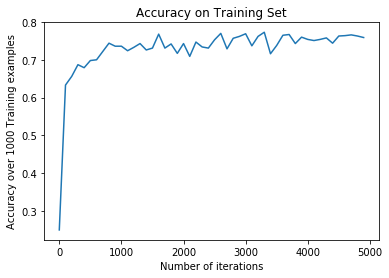

In [261]:
plt.plot(iterations, train_accs)
plt.title("Accuracy on Training Set")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy over 1000 Training examples")
plt.show()

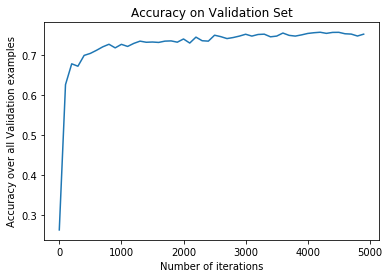

In [262]:
plt.plot(iterations, val_accs)
plt.title("Accuracy on Validation Set")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy over all Validation examples")
plt.show()

### Question 19
The best optimizer/learning rate pair that I found was Adagrad with a learning rate of .01. The best validation accuracy I received was 76%.